**1. Download this dataset, ​​https://drive.google.com/file/d/1bQG-CNBg7h4WFZCx0QVSKUJqzEVHYTpC/view?usp=sharing . Get an overview of the dataset. What are the data types of the columns? How many null values are there in each column? Drop the rows that have null values. Drop the column ‘id’.    10 points**

In [1]:
import pandas as pd 
df = pd.read_csv('stroke.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0
5,57210,Female,28,0,0,Yes,Private,Rural,131.80,30.3,never smoked,0
6,61103,Female,64,1,0,Yes,Self-employed,Urban,190.92,31.4,never smoked,0
7,6480,Male,62,0,0,No,Govt_job,Urban,93.55,31.7,never smoked,0
8,62983,Female,26,0,0,Yes,Private,Urban,138.02,20.3,smokes,0
9,50784,Male,63,0,0,Yes,Private,Rural,228.56,27.4,never smoked,1


In [2]:
# datatypes of the columns
df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [3]:
# how many null values
df.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [4]:
df.shape

(1136, 12)

In [5]:
# drop rows w/ null values
df_new = df.dropna(axis=0, how='any', inplace=False)
df_new.shape

(1084, 12)

In [6]:
# drop the column 'id'
df_new_ = df_new.drop(['id'], axis=1)
df_new_.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

**2. Use value_counts() to see the range of values in each column. Is the target variable balanced?  5 points**

In [7]:
df_new_ = df_new_.rename(columns={'stroke': 'target'})
df_new_['target'].value_counts(dropna=False)

0    968
1    116
Name: target, dtype: int64

The target variable is not balanced, since the number of non-stroke victims is significantly more than the positive cases.

**3. Generate boxplots for all the numerical features vs. the target variable. From observing the boxplots,  which features show significant variance between the two groups? Which features show slight variance between the two groups?  10 points**

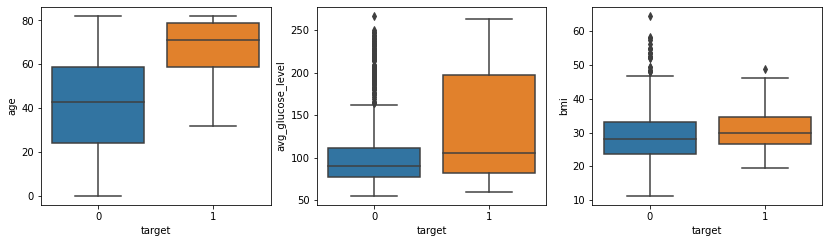

In [15]:
# generate the boxplots
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

num_features = ['age','avg_glucose_level', 'bmi']
fig=plt.figure(figsize=(14, 8))

for i in range(len(num_features)):
    column=num_features[i]
    sub=fig.add_subplot(2, 3, i+1)
    sns.boxplot(x='target', y=column, data=df_new_)

*Features w/ significant variance btwn the two groups*:
- avg_glucose_level

*Features w/ slight variance btwn the two groups*:
- bmi
- age

**4. Use ANOVA f-test to obtain the f-scores and p-values for the numerical feature. Do these numbers match your observation from Q3?  Is there any feature that shall be removed? If yes, remove them. 10 points**

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df_new_.loc[:, ['age', 'avg_glucose_level', 'bmi']]
y = df_new_.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress=True)

print("F-score:")
print(bestFeatures.scores_)

print("P-values:")
print(bestFeatures.pvalues_)

F-score:
[154.72664305  44.65449618   7.28477298]
P-values:
[0.         0.         0.00706249]


My observation from question 3 was that avg_glucose_level and hypertension showed significant difference between the positive and negative groups. This means that I would expect the F-score to be smaller, indicating that these variables aren't that relevant to the target variable. 

The avg_glucose_level F-score: 44.65449618
The hypertension F-score: 32.61928431
The bmi F-score: 7.28477298
The age F-score: 154.72664305

Compared to the other data, the hypertension and avg_glucose_level are not as relevant as two of the other variables, age and heart_disease. The F-score for bmi is the least, meaning that it is not relevant to the target score - this is different than my prediction. In this case, the bmi should be removed.

On the other hand, my prediction for the age was accurate, as it is the most relevant to the target out of all numerical variables in the dataset. 

In [17]:
df_new_rel = df_new_.drop('bmi', axis=1)
df_new_rel.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,target
0,Female,31,0,0,No,Govt_job,Rural,70.66,never smoked,0
1,Female,13,0,0,No,children,Rural,85.81,Unknown,0
2,Male,18,0,0,No,Private,Urban,60.56,never smoked,0
3,Female,65,0,0,Yes,Private,Urban,205.77,formerly smoked,1
4,Male,4,0,0,No,children,Rural,90.42,Unknown,0


**5. Generate grouped barplots for all the categorical features vs. the target variable. From observing the plots, for each feature, do people of different genders have the same probability of getting stroke?  Do people with previous heart disease versas people with no heart disease have the same probability of getting stroke? 10 points**

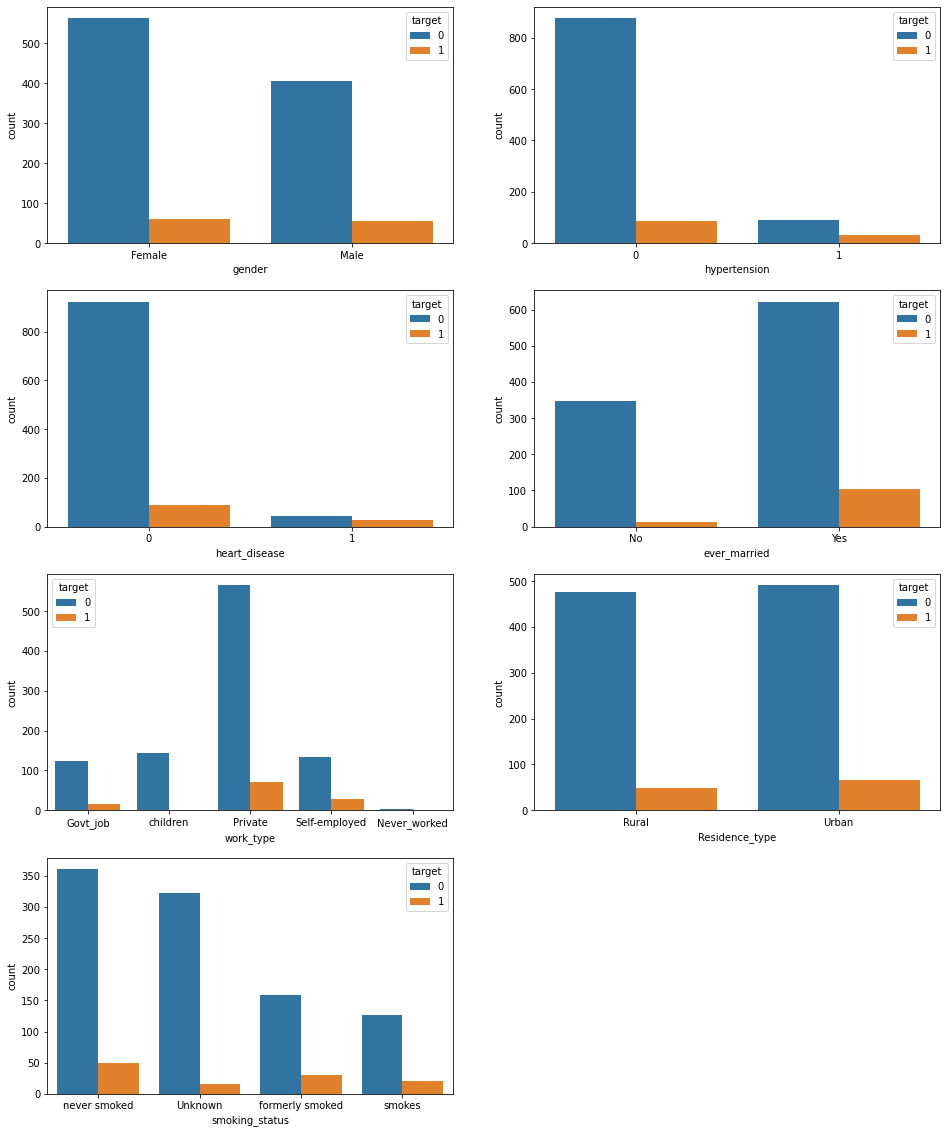

In [35]:
cat_list=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
fig=plt.figure(figsize=(16,20))

for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(4,2,i+1)
    chart=sns.countplot(x=column, hue='target', data=df_new_rel)

**a. do people of different genders have the same probability of getting stroke**
It appears that the probability to have a stroke is about the same between females and males, with the amount of positive cases not having much difference.

**b. Do people with previous heart disease versas people with no heart disease have the same probability of getting stroke?**
It appears that there is more probability for a stroke for those with no heart disease, than those with previous heart disease. 

**6. Convert some of the categorical variables to numeric if necessary. For example, use  [0, 1, 2, 3] to represent ['never smoked', 'Unknown', 'formerly smoked', 'smokes']. 10 points**

In [37]:
df_withdummies = pd.get_dummies(df_new_rel, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df_withdummies.head()

,age,hypertension,heart_disease,avg_glucose_level,target,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,31,0,0,70.66,0,0,0,0,0,0,0,0,0,1,0
1,13,0,0,85.81,0,0,0,0,0,0,1,0,0,0,0
2,18,0,0,60.56,0,1,0,0,1,0,0,1,0,1,0
3,65,0,0,205.77,1,0,1,0,1,0,0,1,1,0,0
4,4,0,0,90.42,0,1,0,0,0,0,1,0,0,0,0


**7. Use chi-squared test to see the dependance of each categorical feature and the target. Remove the features of which the p-values are smaller than 0.05. 10 points**

In [40]:
x = df_withdummies.loc[:, ['hypertension', 'heart_disease', 'gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private'
                           , 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked'
                          , 'smoking_status_never smoked', 'smoking_status_smokes']]
y = df_withdummies.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print("Chi-squared score:")
print(catFeatures.scores_)
print("P-value:")
print(catFeatures.pvalues_)

Chi-squared score:
[28.18215262 51.21576355  1.00925757  9.9776686   0.23966942  0.24147841
  7.54100016 17.37603306  0.99606261  5.43563057  0.67051311  1.8843447 ]
P-value:
[0.00000011 0.         0.31508077 0.0015845  0.62444498 0.62314037
 0.00603106 0.00003067 0.31826512 0.01972997 0.41287277 0.16984117]


Features w/ P-value < 0.05
- 0.00000011 Hypertension
- 0.0015845 ever_married_Yes
- 0.00603106 work_type_Self-employed
- 0.00003067 work_type_children
- 0.01972997 smoking_status_formerly smoked

In [41]:
drop_cols = ['hypertension', 'ever_married_Yes', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked']
df_clean_wdums = df_withdummies.drop(drop_cols, axis=1)
df_clean_wdums.head()

,age,heart_disease,avg_glucose_level,target,gender_Male,work_type_Never_worked,work_type_Private,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,31,0,70.66,0,0,0,0,0,1,0
1,13,0,85.81,0,0,0,0,0,0,0
2,18,0,60.56,0,1,0,1,1,1,0
3,65,0,205.77,1,0,0,1,1,0,0
4,4,0,90.42,0,1,0,0,0,0,0


**8. Change the categorical variables with more than two unique values to dummy variables. For example, the variable ‘hypertension’ has only two options and does not need more dummy variables.   10 points**

In [42]:
# no categorical variables w/ more than one unique value present

**9. Split the dataset into 80% training dataset and 20% testing dataset. 5 points**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score
, average_precision_score, f1_score, classification_report, accuracy_score
, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

x = df_clean_wdums.loc[:, df_clean_wdums.columns!='target']
y = df_clean_wdums['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)  # declare method
print("Training shapes:")
print(x_train.shape)
print(y_train.shape)

print("Testing shapes:")
print(x_test.shape)
print(y_test.shape)

Training shapes:
(867, 9)
(867,)
Testing shapes:
(217, 9)
(217,)


**10. Use the over-sampling method to balance the training dataset. 10 points**

In [45]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)  # call the method

oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print("Training shape:")
print(x_train.shape)
print(y_train.shape)

print("Oversample shape:")
print(oversampled_x.shape)

Training shape:
(867, 9)
(867,)
Oversample shape:
(1548, 9)


**11. Build the logistic regression model with the training dataset. Evaluate the model with the testing dataset. Get the accuracy score of the model and the confusion matrix of the result. 10 points**

In [46]:
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

LogisticRegression(max_iter=2000, penalty='none')

In [47]:
test_pred = LogRegression.predict(x_train)

In [48]:
accuracy_score(y_train, test_pred)

NameError: name 'accuracy_score' is not defined

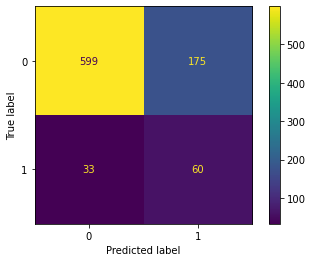

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_train, y_train)